Task 1: Regression Analysis

In [1]:
#importing necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
#loading dataset

data = pd.read_csv('1) iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
#Removing null values

data.dropna(inplace=True)

In [22]:
#Removing duplicates

data.drop_duplicates(inplace=True)

In [24]:
#Row and columns

data.shape

(147, 5)

In [25]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
#Converting species to numerical values

data['species'] = data['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
#Data splitting

X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
#Initialising Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
#Evaluating the Linear regression

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.04828932661119848
R-squared: 0.9341065455608646


Task 2: Time Series Analysis

In [30]:
#importing necessary libraries

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

Text(0, 0.5, 'Stock Price')

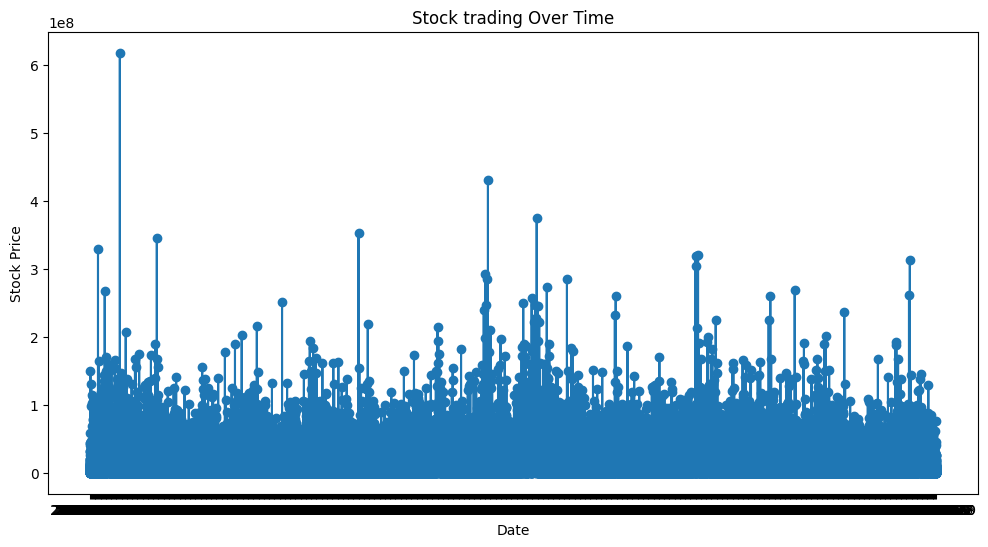

In [65]:
#Plot time-series data and identify patterns

data = pd.read_csv('2) Stock Prices Data Set.csv')

plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['volume'], marker='o', linestyle='-')
plt.title('Stock trading Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')

In [66]:
#Decompose the series into trend, seasonality, and residuals using statsmodels.

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

model = ARIMA(data['close'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

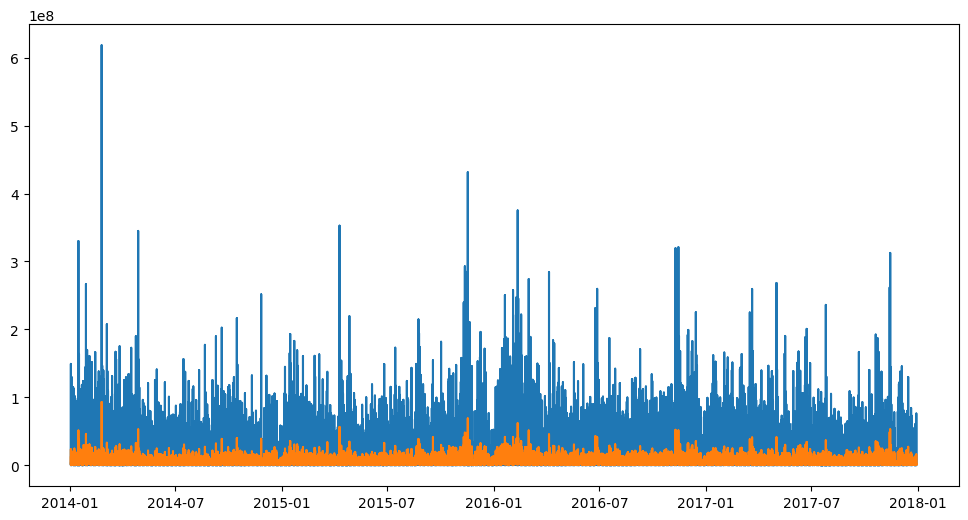

In [67]:
#Perform moving average smoothing and plot the results

data['Moving Average'] = data['volume'].rolling(window=7).mean()
data.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['volume'], label='Original')
plt.plot(data.index, data['Moving Average'], label='Moving Average')
plt

Task 3: Clustering Analysis (KMeans)

In [38]:
#importing libraries

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
#loading data

iris = pd.read_csv('1) iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [55]:
#Standardise dataset

iris['species'] = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

scaler = StandardScaler()
data_scaled = scaler.fit_transform(iris)

In [56]:
#K-Means clustering and determine the optimal number of clusters using the elbow method

model = KMeans(n_clusters=3, random_state=42)
model.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

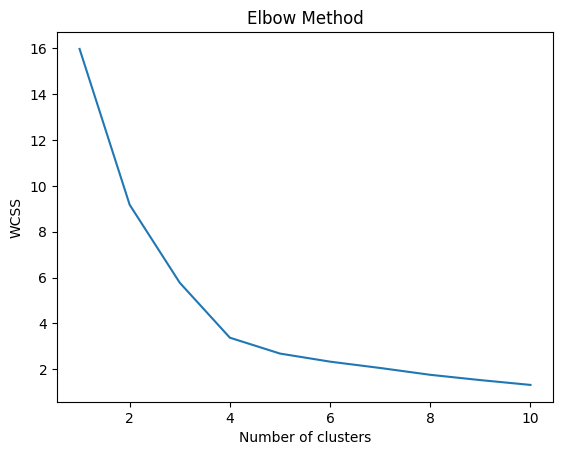

In [57]:
import numpy as np

data = np.random.rand(100, 2)  # Random data for demonstration

# Calculate WCSS for different k values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

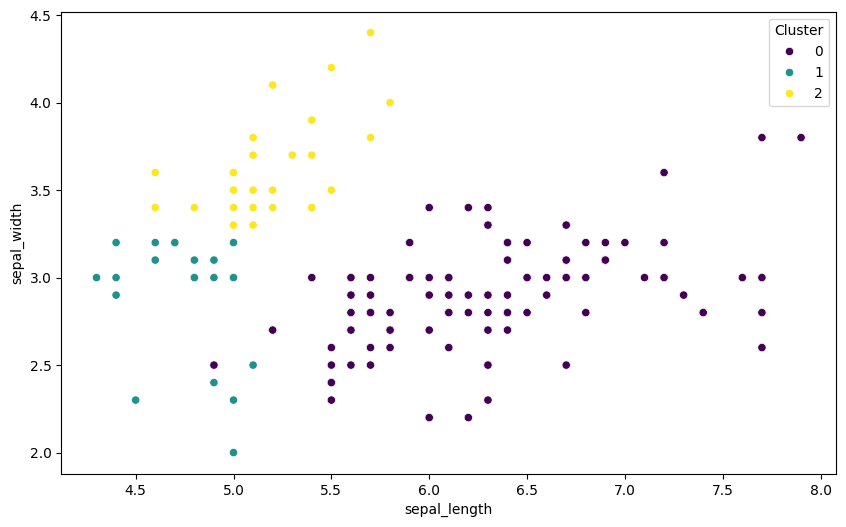

In [59]:
#Visualise clusters 2D scatterplot

iris['Cluster'] = model.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='Cluster', data=iris, palette='viridis')